# Clasificación del Carácter de Título según el Título de acuerdo a su casa de estudio y el Espacio Curricular
Este notebook utiliza el dataset limpio para predecir el Carácter del titulo, como Docente, Habilitante o Supletorio
según el titulo, la institución emisora (nombre) y el espacio curricular (desc_espacio), entrenando un modelo de Regresión Logística

In [1]:
# Importar las librerías necesarias. Como pandas, para manejar el dataset,
#sklearn, que posee las herramientas de ML para preprocesamiento y evaluación, y,
# seaborn y matplotlib para visualizar los resultados.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset limpio
df = pd.read_csv('C:/Users/Usuario/OneDrive/Documentos/BASE_DE_DATOS_E_INTELIGENCIA_ARTIFICIAL/2025/APRENDIZAJE AUTOMATICO (2A1C)/PARCIAL/Clasificacion_Asignacion_DocentesTDF/data/processed/dataset_docentes_etl.csv')
df.head

<bound method NDFrame.head of        idtitulo_real                                             titulo  \
0                462                                PROFESORA DE INGLÉS   
1                462                                PROFESORA DE INGLÉS   
2                462                                PROFESORA DE INGLÉS   
3                462                                PROFESORA DE INGLÉS   
4                462                                PROFESORA DE INGLÉS   
...              ...                                                ...   
51621           4123  PROFESOR/A DE EDUCACIÓN SECUNDARIA EN LENGUA Y...   
51622           4123  PROFESOR/A DE EDUCACIÓN SECUNDARIA EN LENGUA Y...   
51623           4123  PROFESOR/A DE EDUCACIÓN SECUNDARIA EN LENGUA Y...   
51624           4123  PROFESOR/A DE EDUCACIÓN SECUNDARIA EN LENGUA Y...   
51625           4123  PROFESOR/A DE EDUCACIÓN SECUNDARIA EN LENGUA Y...   

                                                  nombre provincia  \

In [3]:
# Aseguramos que no haya nulos relevantes
df = df.dropna(subset=['caracter', 'titulo', 'nombre', 'desc_espacio'])  

In [4]:
# Selección de variables, separando la variable independiente (X: columnas que describen al aspirante) 
#y la independiente (y:categoría del aspirante isncripto que queremos predecir: 'Docente', 'Habilitante', 'Supletorio')
X = df[['titulo', 'nombre', 'desc_espacio']]
y = df['caracter']

In [5]:
# Codificación One-Hot: Convierte las variables categóricas (titulo, nombre, desc_espacio) en números binarios (0 o 1) con One-Hot Encoding,
# para que el modelo pueda trabajar con ellas.
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)
X_encoded.shape

(51626, 4754)

In [6]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Escalado de características y entrenamiento del modelo Regresión Logística Multiclase
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

     Docente       0.86      0.90      0.88      3934
 Habilitante       0.86      0.85      0.85      3940
  Supletorio       0.77      0.74      0.75      2452

    accuracy                           0.84     10326
   macro avg       0.83      0.83      0.83     10326
weighted avg       0.84      0.84      0.84     10326



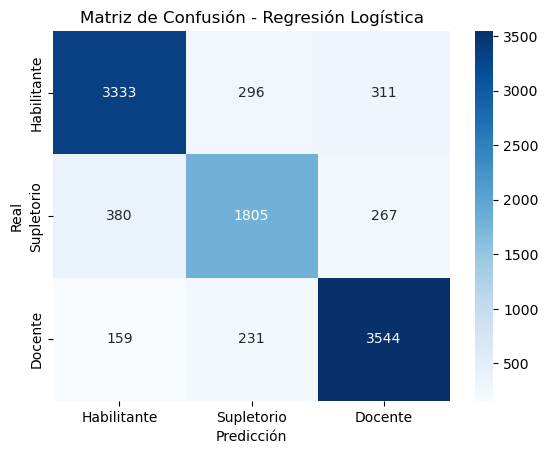

In [8]:
#Evalaucion del modelo
print("REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=['Habilitante', 'Supletorio', 'Docente'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Habilitante', 'Supletorio', 'Docente'], yticklabels=['Habilitante', 'Supletorio', 'Docente'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

El reporte de Clasificación indica que una muy buena exactitud para la clasificación como docente y habilitante, en cambio para el caracter Supletorio, se detectan eerrores en clases. algunos caso de otras clases fueron mal clasificados como supletorios. en cuento a Recall, se encuentran correctamente el de caracter Docente. , le siguen el habilitante, y en el caso de los supletorios se le escapan vaarios supletorios reales. y finalemnte en F1Socre el de docente tiene muy buen equilibrio,  ya que idnetifica bien a los docentes, en el caso del habilitantes tiene buen rendimiennto y el de supletorio es la clase más difícil de predecir.
El Accuracy total tiene un 84%, El modelo acierta 84 de cada 100 clasificaciones.
La matriz de confusión muestra la relación entre las predicciones del modelo y las clases reales en un conjunto de datos. Por ejemplo, en las esquinas se ve  como docentes hubo 3544 aciertos de 3934, y como habilitantes 3333 de 3940. En cierta forma el modelo hizo muchas predicciones correctas 